In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from colicoords.cnn.unet import get_unet_256
from colicoords.cnn.preprocess import resize_stack, norm_hampel
from colicoords import iter_subplots
import numpy as np
import tifffile
import os
from addict import Dict

Using TensorFlow backend.


In [10]:
wts_pth = r'I:\_processed_data\2019\20190514_yichen_various_segmentation\wts_output\wts_bf_50-0.035334_iter4.h5'

#input_pth = r'F:\_processed_big\t3ss\20191002_deltaescv_c41_eyfp-escv_repeat_03'  #moved here
input_pth = r'I:\20191023_c41_eyfp-escv_escrstu_AHT25'  #tempdir, fasterspeed

In [3]:
def process_stack(model, arr):
    resized = resize_stack(arr, 0.5)
    norm = np.stack([norm_hampel(a) for a in resized])
    prediction = model.predict(np.expand_dims(norm, -1))
    
    predict_resized = resize_stack(prediction.squeeze(), 2)
    out_binary = (predict_resized > 0.5).astype(int)
        
    return out_binary

In [6]:
model = get_unet_256(input_shape=(256, 256, 1))
model.load_weights(wts_pth)

In [11]:
fnames = ['c41_yfp-escv_aht20', 'c41_yfp-escv_aht25', 'c41_yfp-escv_rstu_aht25_iptg0', 'c41_yfp-escv_rstu_aht25_iptg20']

In [12]:
bd = Dict()
for fname in fnames:
    print(fname)
    dd = bd[fname]
    dd.bf = np.load(os.path.join(input_pth, fname + '_BF_flat.npy'))
    dd.binary = process_stack(model, dd.bf)
    
    np.save(os.path.join(input_pth, fname + '_segmented.npy'), dd.binary)

c41_yfp-escv_aht20
c41_yfp-escv_aht25
c41_yfp-escv_rstu_aht25_iptg0
c41_yfp-escv_rstu_aht25_iptg20


<IPython.core.display.Javascript object>


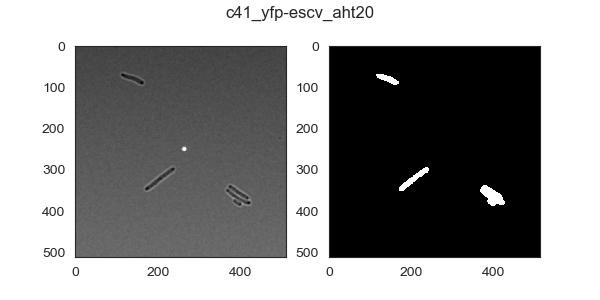

In [21]:
fname = fnames[0]

dd = bd[fname]
fig, (ax1, ax2) = iter_subplots(1, 2, figsize=(6,3))
ax1.iter_imshow(dd.bf, cmap='gray')
ax2.iter_imshow(dd.binary, cmap='gray')
fig.display()
t = fig.suptitle(fname)

<IPython.core.display.Javascript object>


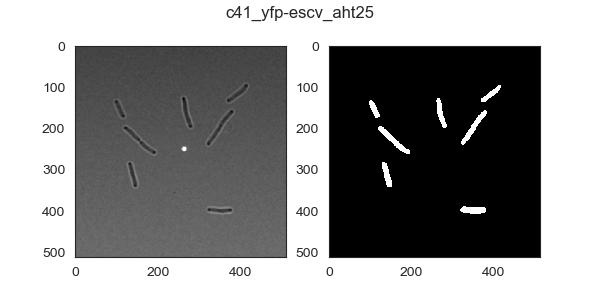

In [22]:
fname = fnames[1]

dd = bd[fname]
fig, (ax1, ax2) = iter_subplots(1, 2, figsize=(6,3))
ax1.iter_imshow(dd.bf, cmap='gray')
ax2.iter_imshow(dd.binary, cmap='gray')
fig.display()
t = fig.suptitle(fname)

<IPython.core.display.Javascript object>


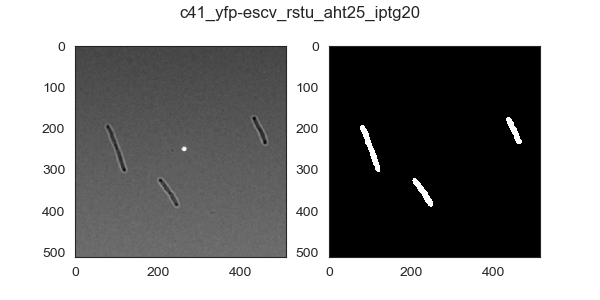

In [23]:
fname = fnames[2]

dd = bd[fname]
fig, (ax1, ax2) = iter_subplots(1, 2, figsize=(6,3))
ax1.iter_imshow(dd.bf, cmap='gray')
ax2.iter_imshow(dd.binary, cmap='gray')
fig.display()
t = fig.suptitle(fname)

In [24]:
fname = fnames[4]

dd = bd[fname]
fig, (ax1, ax2) = iter_subplots(1, 2, figsize=(6,3))
ax1.iter_imshow(dd.bf, cmap='gray')
ax2.iter_imshow(dd.binary, cmap='gray')
fig.display()
t = fig.suptitle(fname)

IndexError: list index out of range